# Sobel kernel(verticle edge detector)

imshow is not grey here, image looks greenish idk why 

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
cvimg = cv2.imread("D:/ML/test_images/bird.png")

cvimg1 = cvimg.copy()
cvimg2 = cvimg.copy()

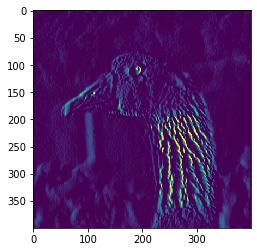

In [3]:
# derivative of image in x direction

cvimg1 = cv2.cvtColor(cvimg1, cv2.COLOR_BGR2GRAY) # convert to grey, reduces computation, maybe sacrifice accuracy.
kernel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
derxdir = cv2.filter2D(cvimg1, -1, kernel)
plt.imshow(derxdir)
plt.show()

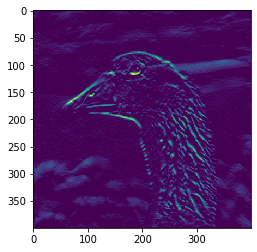

In [4]:
# derivative of image in y direction

cvimg2 = cv2.cvtColor(cvimg2, cv2.COLOR_BGR2GRAY)
kernel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
derydir = cv2.filter2D(cvimg2, -1, kernel)
plt.imshow(derydir)
plt.show()

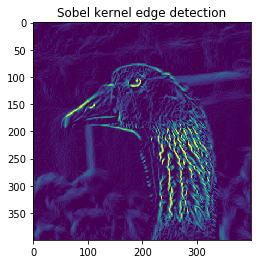

In [6]:
# magnitude 

mag = np.sqrt(pow(derxdir, 2.0) + pow(derydir, 2.0))
plt.imshow(np.clip(mag,0,255).astype(int))
plt.title("Sobel kernel edge detection")
plt.show()

# Prewit kernel

only difference is in the kernel we use [-1,0,1], [-1,0,1], [-1,0,1] 

In [15]:
cvimg = cv2.imread("D:/ML/test_images/bird.png")

cvimg1 = cvimg.copy()
cvimg2 = cvimg.copy()

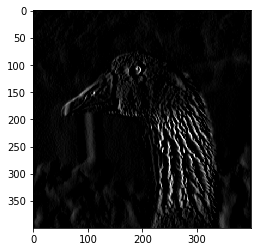

In [16]:
# derivative of image in x direction

cvimg1 = cv2.cvtColor(cvimg1, cv2.COLOR_BGR2GRAY) # convert to grey
kernel = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
derxdir = cv2.filter2D(cvimg1, -1, kernel)
plt.imshow(derxdir, cmap='gray')
plt.show()

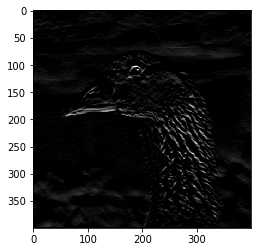

In [17]:
# derivative of image in y direction

cvimg2 = cv2.cvtColor(cvimg2, cv2.COLOR_BGR2GRAY)
kernel = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
derydir = cv2.filter2D(cvimg2, -1, kernel)
plt.imshow(derydir, cmap='gray')
plt.show()

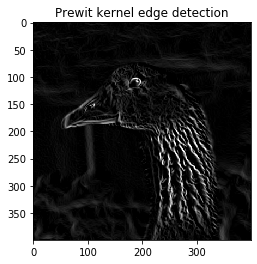

In [19]:
# magnitude(tells use rate of change) 

mag = np.sqrt(pow(derxdir, 2.0) + pow(derydir, 2.0))
plt.imshow(np.clip(mag,0,255).astype(int), cmap='gray') # clipped for showing img
plt.title("Prewit kernel edge detection")
plt.show()

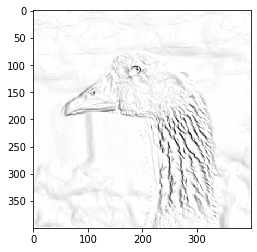

In [37]:
# then finally apply threshold, image should be greyscale
# cv2.threshold parameters (img, threshold_lim, val_to_replace_with, method_of_thresholding)

_ , thres_img = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
thresh_img = mag.astype(int) # float cannot be imshowed!
plt.imshow(thresh_img, cmap='binary') # binary black or white
plt.show()

# Laplacian Operator

here we find second derivative of (x,y) which is sensitive to noise, so first we apply gaussian blur to make image smooth.

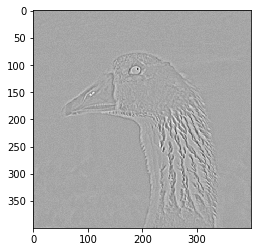

In [44]:
cvimg1 = cvimg.copy()
gray_img = cv2.cvtColor(cvimg1, cv2.COLOR_BGR2GRAY) # convert to grey

blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
laplacian = cv2.Laplacian(blur_img, cv2.CV_16S)

plt.imshow(laplacian.astype(int), cmap='gray')
plt.show()

# Canny Detector

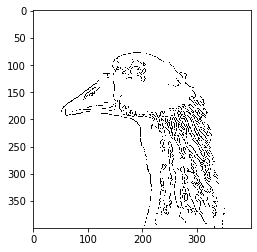

In [102]:
cvimg1 = cvimg.copy()
gray_img = cv2.cvtColor(cvimg1, cv2.COLOR_BGR2GRAY) # convert to grey

blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
canny = cv2.Canny(blur_img, 50, 100, L2gradient=True) # lower and upper threshold

plt.imshow(canny.astype(int), cmap='binary')
plt.show()